# WeatherPy
----

#### Analysis
* Temperature increases as we approach the equator. However, temperature peaks at around 20-22 degrees latitude, not             exactly at the equatorial line. This may be due to the   Earth's tilt in the axis known as obliquity.
* There is alomost no correlation between cloudiness and latitude. It is almost distributed all around the globe.
* Even the correlation between latitude and wind speed is very weak.
* Humidity is consistently higher in the tropic but still not a strong corealtion with lattitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create variable name to store datas
city_name = []
max_temperature =[]
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
Lat = []
Lang =[]

# initializes record counter
records = 0 

# used to prevent exceeding API limit
max_calls = 50                                                              
sets = 1 
        
print("Beginning Data Retrieval")
print("-----------------------------------------------------------")

#Initiate the for loop
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    response_json = requests.get(query_url).json()
    print(f"Processing Record {records} of Set {sets}|{city}")
    records += 1
    
    if records == max_calls:
        sets += 1
        records = 0
        
    
    try:
        city_name.append(response_json["name"])
        max_temperature.append(response_json["main"]["temp_max"])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        Lat.append(response_json['coord']['lat'])
        Lang.append(response_json['coord']['lon'])
    except:
        print("City not found. Skipping...")
        continue

print("-----------------------------------------------------------")
print("Data Retrieval Complete ")
print("-----------------------------------------------------------")

Beginning Data Retrieval
-----------------------------------------------------------
Processing Record 0 of Set 1|sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 1|saiha
Processing Record 2 of Set 1|qaanaaq
Processing Record 3 of Set 1|atuona
Processing Record 4 of Set 1|taolanaro
City not found. Skipping...
Processing Record 5 of Set 1|sarahan
Processing Record 6 of Set 1|drochia
Processing Record 7 of Set 1|albany
Processing Record 8 of Set 1|castro
Processing Record 9 of Set 1|bredasdorp
Processing Record 10 of Set 1|rikitea
Processing Record 11 of Set 1|hobart
Processing Record 12 of Set 1|ushuaia
Processing Record 13 of Set 1|cidreira
Processing Record 14 of Set 1|pangai
Processing Record 15 of Set 1|tiksi
Processing Record 16 of Set 1|lebu
Processing Record 17 of Set 1|arraial do cabo
Processing Record 18 of Set 1|yellowknife
Processing Record 19 of Set 1|avarua
Processing Record 20 of Set 1|kodiak
Processing Record 21 of Set 1|sao joao da barra
Processing Rec

Processing Record 45 of Set 4|benguela
Processing Record 46 of Set 4|maebaru
Processing Record 47 of Set 4|san jeronimo
Processing Record 48 of Set 4|alotau
City not found. Skipping...
Processing Record 49 of Set 4|kuche
City not found. Skipping...
Processing Record 0 of Set 5|lasa
Processing Record 1 of Set 5|jiangkou
Processing Record 2 of Set 5|beian
Processing Record 3 of Set 5|bijie
Processing Record 4 of Set 5|zheleznodorozhnyy
Processing Record 5 of Set 5|luderitz
Processing Record 6 of Set 5|emerald
Processing Record 7 of Set 5|namibe
Processing Record 8 of Set 5|ambilobe
Processing Record 9 of Set 5|kaeo
Processing Record 10 of Set 5|akdepe
Processing Record 11 of Set 5|antalaha
Processing Record 12 of Set 5|gariaband
Processing Record 13 of Set 5|lumphat
Processing Record 14 of Set 5|boddam
Processing Record 15 of Set 5|ulstrup
Processing Record 16 of Set 5|tazovskiy
Processing Record 17 of Set 5|nabire
Processing Record 18 of Set 5|laguna
Processing Record 19 of Set 5|marysv

Processing Record 40 of Set 8|robertson
Processing Record 41 of Set 8|chifeng
Processing Record 42 of Set 8|kattivakkam
Processing Record 43 of Set 8|benicarlo
Processing Record 44 of Set 8|palo alto
Processing Record 45 of Set 8|yeppoon
Processing Record 46 of Set 8|badarganj
Processing Record 47 of Set 8|inuvik
Processing Record 48 of Set 8|port lincoln
Processing Record 49 of Set 8|san juan de abajo
Processing Record 0 of Set 9|qaqortoq
Processing Record 1 of Set 9|lethem
Processing Record 2 of Set 9|along
Processing Record 3 of Set 9|gat
Processing Record 4 of Set 9|umm kaddadah
Processing Record 5 of Set 9|santa maria da vitoria
Processing Record 6 of Set 9|mersing
Processing Record 7 of Set 9|bilma
Processing Record 8 of Set 9|tezu
Processing Record 9 of Set 9|srednekolymsk
Processing Record 10 of Set 9|pierre
Processing Record 11 of Set 9|viedma
Processing Record 12 of Set 9|praia da vitoria
Processing Record 13 of Set 9|sitka
Processing Record 14 of Set 9|puerto quijarro
Proces

Processing Record 28 of Set 12|khurai
Processing Record 29 of Set 12|muravlenko
Processing Record 30 of Set 12|ruatoria
City not found. Skipping...
Processing Record 31 of Set 12|marsa matruh
Processing Record 32 of Set 12|wawa
Processing Record 33 of Set 12|chandia
Processing Record 34 of Set 12|iquitos
Processing Record 35 of Set 12|aragarcas
Processing Record 36 of Set 12|caravelas
Processing Record 37 of Set 12|kromy
Processing Record 38 of Set 12|kamojima
Processing Record 39 of Set 12|trairi
Processing Record 40 of Set 12|bubaque
Processing Record 41 of Set 12|capiibary
Processing Record 42 of Set 12|conakry
Processing Record 43 of Set 12|vardo
Processing Record 44 of Set 12|wulanhaote
City not found. Skipping...
Processing Record 45 of Set 12|zyryanka
Processing Record 46 of Set 12|udachnyy
Processing Record 47 of Set 12|kadykchan
City not found. Skipping...
Processing Record 48 of Set 12|kavaratti
Processing Record 49 of Set 12|coulihaut
City not found. Skipping...
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create the weather dataframe

weather_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":Lat, 
    "Lng":Lang, 
    "Max Temp": max_temperature,
    "Wind Speed":wind_speed
    })
weather_df.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [5]:
#Save the dataframe in csv format
weather_df.to_csv('WeatherDataFrame.csv')

#display the weather dataframe 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saiha,90,IN,1562651816,91,22.49,92.98,82.66,7.25
1,Qaanaaq,95,GL,1562651818,89,77.48,-69.36,38.02,2.19
2,Atuona,7,PF,1562651818,74,-9.80,-139.03,80.32,15.48
3,Sarahan,65,IN,1562651819,69,31.51,77.79,71.14,5.35
4,Drochia,97,MD,1562651819,72,48.03,27.81,56.92,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

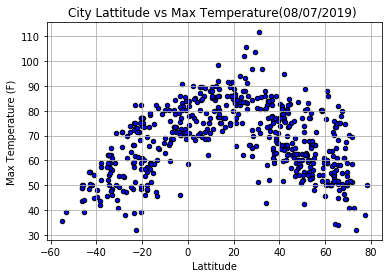

In [6]:
#plot the graph Latitude vs. Temperature

weather_df.plot.scatter(x='Lat',y='Max Temp',c='Blue',edgecolors='black',marker="o")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Lattitude vs Max Temperature(08/07/2019) ")
plt.grid()
plt.savefig("City_Lattitude_vs_Max_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

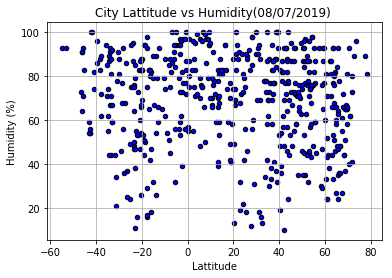

In [7]:
#plot the graph Latitude vs. Humidity

weather_df.plot.scatter(x='Lat',y='Humidity',c='Blue',edgecolors='black',marker="o")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("City Lattitude vs Humidity(08/07/2019) ")
plt.grid()
plt.savefig("City_Lattitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

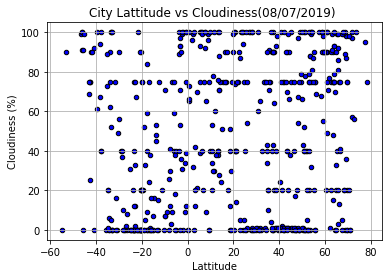

In [8]:
#plot the graph Latitude vs. Cloudiness

weather_df.plot.scatter(x='Lat',y='Cloudiness',c='Blue',edgecolors = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Lattitude vs Cloudiness(08/07/2019) ")
plt.grid()
plt.savefig("City_Lattitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

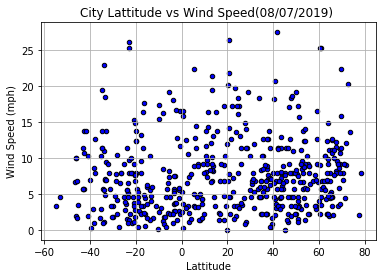

In [9]:
#plot the graph Latitude vs. Wind Speed

weather_df.plot.scatter(x='Lat',y='Wind Speed',c='Blue',edgecolors = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Lattitude vs Wind Speed(08/07/2019) ")
plt.grid()
plt.savefig("City_Lattitude_vs_Wind_Speed.png")
plt.show()